In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pandas as pd

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
torch.cuda.set_device(1)

In [6]:
PATH = 'words/'
csv_path = PATH + 'csv_files/all.csv'
n = len(list(open(csv_path))) - 1 # -1 to ignore the header line
n

15993

In [15]:

arch = resnet34
sz = 64
bs = 64
val_idxs = get_cv_idxs(n)
tfms = tfms_from_model(arch, sz)

data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, bs = bs, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [16]:
# comparing instances of dataset object and original data

# picking first image (index 0)
x1 = data.trn_ds.get_x(0)

# picking file name of first image
path = data.trn_ds.fnames[0]
x2 = plt.imread(PATH + path)
# image in grayscale, repeat it 3 times to get RGB values
x2 = np.stack((x2, x2, x2), axis = 2)



(-0.5, 131.5, 95.5, -0.5)

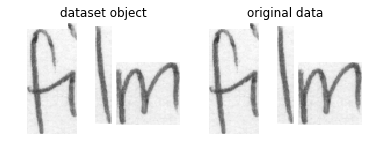

In [17]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x1)
ax[0].axis('off')
ax[0].set(title = 'dataset object')
ax[1].imshow(x2)
ax[1].set(title = 'original data')
ax[1].axis('off')

In [8]:
fn = [PATH + data.trn_ds.fnames[0]]; fn

['data/words/author_classification_same_folder/files/c03-000a-00-01.png']

In [18]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz)
    return ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [16]:
learn = ConvLearner.pretrained(arch, data)

In [ ]:
lrf=learn.lr_find()
learn.sched.plot()

In [17]:
lr = 0.02
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.800428   1.399813   0.588236  
    1      1.473134   1.117123   0.653861                   
    2      1.286479   1.043366   0.681704                   
    3      1.33528    1.030764   0.672329                   
    4      1.182469   0.953246   0.702349                   
    5      1.082981   0.899397   0.720151                   
    6      1.037321   0.88932    0.727339                   



[0.88932043, 0.7273387098312378]

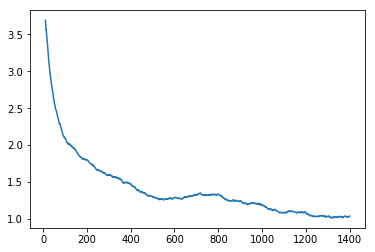

In [18]:
learn.sched.plot_loss()

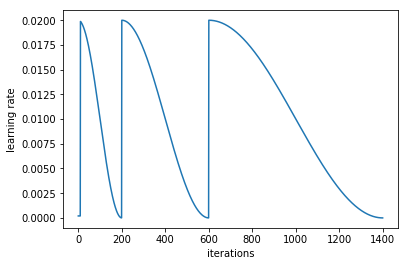

In [19]:
learn.sched.plot_lr()

In [20]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.722617   0.479798   0.845877  
    1      0.487059   0.369099   0.871179                    
    2      0.302624   0.28568    0.904647                    
    3      0.342813   0.41338    0.862772                    
    4      0.229126   0.287556   0.902762                    
    5      0.167279   0.245544   0.923387                    
    6      0.128042   0.234501   0.926825                    



[0.23450124, 0.9268245971202851]

In [16]:
learn.save(f'{sz}')

In [19]:
tmfs = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)

In [20]:
data = ImageClassifierData.from_csv(path = PATH, folder = 'files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [21]:
learn_data_agumentation = ConvLearner.pretrained(arch, data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 90%|████████▉ | 179/200 [00:03<00:00, 55.18it/s, loss=12.8]


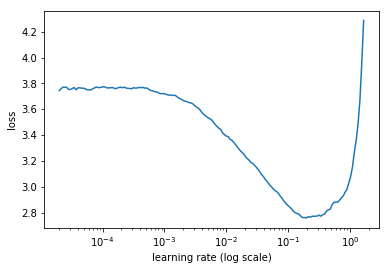

In [22]:
lrf=learn_data_agumentation.lr_find()
learn_data_agumentation.sched.plot()

In [23]:
lr = 0.02
learn_data_agumentation.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.785814   1.406398   0.579456  
    1      1.467673   1.109535   0.657671                   
    2      1.2646     1.038413   0.678579                   
    3      1.338508   1.003204   0.690444                   
    4      1.201323   0.946454   0.697954                   
    5      1.082438   0.89568    0.719859                   
    6      1.030465   0.892006   0.723921                   



[0.8920061, 0.7239213705062866]

In [24]:
lrs = np.array([lr/9,lr/3,lr])
learn_data_agumentation.unfreeze()
learn_data_agumentation.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.734976   0.496156   0.839294  
    1      0.520554   0.387842   0.875534                    
    2      0.320993   0.302363   0.903075                    
    3      0.370455   0.427289   0.856804                    
    4      0.257031   0.290099   0.9037                      
    5      0.188707   0.237796   0.924335                    
    6      0.150882   0.237121   0.92121                     



[0.23712054, 0.9212096774578095]

In [32]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [29]:
accuracy(preds, y)

0.9215134459036898

In [30]:
multi_preds, y = learn_data_agumentation.TTA()
preds = np.mean(multi_preds, 0)

In [31]:
accuracy(preds,y)

0.9212007504690432